**Intelligent Healthcare Fraud Identification: Leveraging Clustering and Deep Autoencoders**


---



Healthcare fraud is considered a challenge for many societies. Health care funding that could be spent on medicine, care for the elderly, or emergency room visits is instead lost to fraudulent activities by materialistic practitioners or patients. With rising healthcare costs, healthcare fraud is a major contributor to these increasing healthcare costs.

1.import the necessary libararies and dataset


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Detailed Data File:**

The following variables are included in the detailed Physician and Other Supplier data file (see Appendix A for a condensed version of variables included)).

npi – National Provider Identifier (NPI) for the performing provider on the claim. The provider NPI is the numeric identifier registered in NPPES.

nppes_provider_last_org_name – When the provider is registered in NPPES as an individual (entity type code=’I’), this is the provider’s last name. When the provider is registered as an organization (entity type code = ‘O’), this is the organization's name.

nppes_provider_first_name – When the provider is registered in NPPES as an individual (entity type code=’I’), this is the provider’s first name. When the provider is registered as an organization (entity type code = ‘O’), this will be blank.

nppes_provider_mi – When the provider is registered in NPPES as an individual (entity type code=’I’), this is the provider’s middle initial. When the provider is registered as an organization (entity type code= ‘O’), this will be blank.

nppes_credentials – When the provider is registered in NPPES as an individual (entity type code=’I’), these are the provider’s credentials. When the provider is registered as an organization (entity type code = ‘O’), this will be blank.

nppes_provider_gender – When the provider is registered in NPPES as an individual (entity type code=’I’), this is the provider’s gender. When the provider is registered as an organization (entity type code = ‘O’), this will be blank.

nppes_entity_code – Type of entity reported in NPPES. An entity code of ‘I’ identifies providers registered as individuals and an entity type code of ‘O’ identifies providers registered as organizations.

nppes_provider_street1 – The first line of the provider’s street address, as reported in NPPES.

nppes_provider_street – The second line of the provider’s street address, as reported in NPPES.

nppes_provider_city – The city where the provider is located, as reported in NPPES.

nppes_provider_zip – The provider’s zip code, as reported in NPPES.

nppes_provider_state – The state where the provider is located, as reported in NPPES. The fifty U.S. states and the District of Columbia are reported by the state postal abbreviation. The following values are used for all other areas:

'XX' = 'Unknown'
'AA' = 'Armed Forces Central/South America'
'AE' = 'Armed Forces Europe'
'AP' = 'Armed Forces Pacific'
'AS' = 'American Samoa'
'GU' = 'Guam'
'MP' = 'North Mariana Islands'
'PR' = 'Puerto Rico'
'VI' = 'Virgin Islands'
'ZZ' = 'Foreign Country'

nppes_provider_country – The country where the provider is located, as reported in NPPES. The country code will be ‘US’ for any state or U.S. possession. For foreign countries (i.e., state values of ‘ZZ’), the provider country values include the following:
AE=United Arab Emirates IT=Italy
AG=Antigua JO= Jordan
AR=Argentina JP=Japan
AU=Australia KR=Korea
BO=Bolivia KW=Kuwait
BR=Brazil KY=Cayman Islands
CA=Canada LB=Lebanon
CH=Switzerland MX=Mexico
CN=China NL=Netherlands
CO=Colombia NO=Norway
DE= Germany NZ=New Zealand
ES= Spain PA=Panama
FR=France PK=Pakistan
GB=Great Britain RW=Rwanda
GR=Greece SA=Saudi Arabia
HU= Hungary SY=Syria
IL= Israel TH=Thailand
IN=India TR=Turkey
IS= Iceland VE=Venezuela

provider_type – Derived from the provider specialty code reported on the claim.

medicare_participation_indicator – Identifies whether the provider participates in Medicare and/or accepts the assigned assignment of Medicare allowed amounts.

place_of_service – Identifies whether the place of service submitted on the claims is a facility (value of ‘F’) or non-facility (value of ‘O’). Non-facility is generally an office setting; however other entities are included in non-facility.

hcpcs_code – HCPCS code used to identify the specific medical service furnished by the provider.

hcpcs_description – Description of the HCPCS code for the specific medical service furnished by the provider.

hcpcs_drug_indicator –Identifies whether the HCPCS code for the specific service furnished by the provider is an HCPCS listed on the Medicare Part B Drug Average Sales Price (ASP) File.

line_srvc_cnt – Number of services provided; note that the metrics used to count the number provided can vary from service to service.

bene_unique_cnt – Number of distinct Medicare beneficiaries receiving the service.

bene_day_srvc_cnt – Number of distinct Medicare beneficiary/per day services.

average_Medicare_allowed_amt – Average of the Medicare allowed amount for the service.

stdev_Medicare_allowed_amt – Standard deviation of the Medicare allowed amounts.

average_submitted_chrg_amt – Average of the charges that the provider submitted for the service.

stdev_submitted_chrg_amt – Standard deviation of the charge amounts submitted by the provider.

average_Medicare_payment_amt – Average amount that Medicare paid after deductible and coinsurance amounts have been deducted for the line item service.

In [ ]:
df=pd.read_csv('Healthcare Providers.csv')
df

,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,1891106191,UPADHYAYULA,SATYASREE,NaN,M.D.,F,I,1402 S GRAND BLVD,FDT 14TH FLOOR,...,99223,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,3354385,1346202256,JONES,WENDY,P,M.D.,F,I,2950 VILLAGE DR,NaN,...,G0202,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.8,118.83,135.31525714
2,3001884,1306820956,DUROCHER,RICHARD,W,DPM,M,I,20 WASHINGTON AVE,STE 212,...,99348,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155,64.4396875,60.5959375
3,7594822,1770523540,FULLARD,JASPER,NaN,MD,M,I,5746 N BROADWAY ST,NaN,...,81002,"Urinalysis, manual test",N,20,18,20,3.5,5,3.43,3.43
4,746159,1073627758,PERROTTI,ANTHONY,E,DO,M,I,875 MILITARY TRL,SUITE 200,...,96372,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40,19.539393939,19.057575758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67320,8384549,1851330567,WARHAFTIG,JEFFREY,NaN,NaN,M,I,5145 S COLLEGE RD,NaN,...,36415,Insertion of needle into vein for collection o...,N,"1,896",843,"1,896",3,18,2.9368987342,2.94
67321,2278941,1235131335,LOVOI,MICHAEL,S,MD,M,I,13725 NORTHWEST BLVD,SUITE 260,...,87804,Detection test for influenza virus,N,59,29,31,16.44,34.949830508,16.11,16.11
67322,5554358,1568464261,EVANS,BRADLEY,H,MD,M,I,10000 SE MAIN ST,SUITE 60,...,93015,Exercise or drug-induced heart and blood vesse...,N,13,13,13,79.93,295.9,48.673846154,46.600769231
67323,9507204,1962507061,MISSAK,MARY,S,M.D.,F,I,7680 AIRWAYS BLVD,NaN,...,99204,"New patient office or other outpatient visit, ...",N,15,15,15,152.7,180,90.118,101.206


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67325 entries, 0 to 67324
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   index                                                     67325 non-null  int64  
 1   National Provider Identifier                              67325 non-null  int64  
 2   Last Name/Organization Name of the Provider               67325 non-null  object 
 3   First Name of the Provider                                64477 non-null  object 
 4   Middle Initial of the Provider                            47580 non-null  object 
 5   Credentials of the Provider                               62477 non-null  object 
 6   Gender of the Provider                                    64478 non-null  object 
 7   Entity Type of the Provider                               67325 non-null  object 
 8   Street Address 1

2.check the missing values & filling values

*   here the new category unknown created




In [ ]:
df.isnull().sum()

index                                                           0
National Provider Identifier                                    0
Last Name/Organization Name of the Provider                     0
First Name of the Provider                                   2848
Middle Initial of the Provider                              19745
Credentials of the Provider                                  4848
Gender of the Provider                                       2847
Entity Type of the Provider                                     0
Street Address 1 of the Provider                                0
Street Address 2 of the Provider                            39818
City of the Provider                                            0
Zip Code of the Provider                                        0
State Code of the Provider                                      1
Country Code of the Provider                                    1
Provider Type                                                   1
Medicare P

In [ ]:
# in gender & credentials missing value to unknown

df['Gender of the Provider'].fillna('Unknown', inplace=True)
df['Credentials of the Provider'].fillna('Unknown_cred', inplace=True)
df

,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,1891106191,UPADHYAYULA,SATYASREE,NaN,M.D.,F,I,1402 S GRAND BLVD,FDT 14TH FLOOR,...,99223,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,3354385,1346202256,JONES,WENDY,P,M.D.,F,I,2950 VILLAGE DR,NaN,...,G0202,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.8,118.83,135.31525714
2,3001884,1306820956,DUROCHER,RICHARD,W,DPM,M,I,20 WASHINGTON AVE,STE 212,...,99348,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155,64.4396875,60.5959375
3,7594822,1770523540,FULLARD,JASPER,NaN,MD,M,I,5746 N BROADWAY ST,NaN,...,81002,"Urinalysis, manual test",N,20,18,20,3.5,5,3.43,3.43
4,746159,1073627758,PERROTTI,ANTHONY,E,DO,M,I,875 MILITARY TRL,SUITE 200,...,96372,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40,19.539393939,19.057575758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67320,8384549,1851330567,WARHAFTIG,JEFFREY,NaN,Unknown_cred,M,I,5145 S COLLEGE RD,NaN,...,36415,Insertion of needle into vein for collection o...,N,"1,896",843,"1,896",3,18,2.9368987342,2.94
67321,2278941,1235131335,LOVOI,MICHAEL,S,MD,M,I,13725 NORTHWEST BLVD,SUITE 260,...,87804,Detection test for influenza virus,N,59,29,31,16.44,34.949830508,16.11,16.11
67322,5554358,1568464261,EVANS,BRADLEY,H,MD,M,I,10000 SE MAIN ST,SUITE 60,...,93015,Exercise or drug-induced heart and blood vesse...,N,13,13,13,79.93,295.9,48.673846154,46.600769231
67323,9507204,1962507061,MISSAK,MARY,S,M.D.,F,I,7680 AIRWAYS BLVD,NaN,...,99204,"New patient office or other outpatient visit, ...",N,15,15,15,152.7,180,90.118,101.206


In [ ]:
df['Gender of the Provider'].value_counts()

Gender of the Provider
M          44873
F          19605
Unknown     2847
Name: count, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67325 entries, 0 to 67324
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   index                                                     67325 non-null  int64  
 1   National Provider Identifier                              67325 non-null  int64  
 2   Last Name/Organization Name of the Provider               67325 non-null  object 
 3   First Name of the Provider                                64477 non-null  object 
 4   Middle Initial of the Provider                            47580 non-null  object 
 5   Credentials of the Provider                               67325 non-null  object 
 6   Gender of the Provider                                    67325 non-null  object 
 7   Entity Type of the Provider                               67325 non-null  object 
 8   Street Address 1

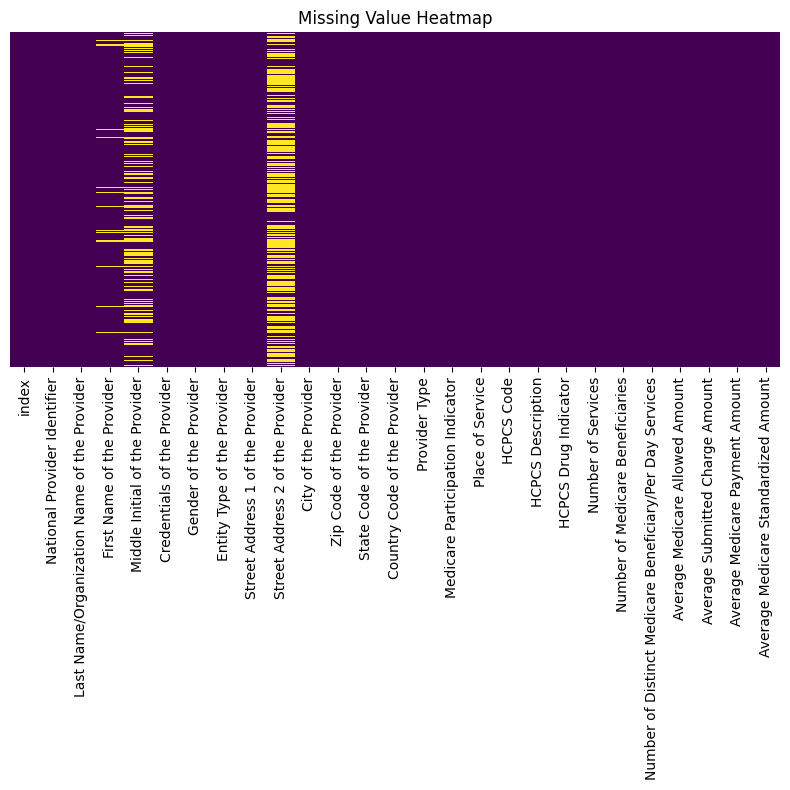

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Value Heatmap')
plt.tight_layout()
plt.show()


Value Counts for Gender of the Provider:
Gender of the Provider
M          44873
F          19605
Unknown     2847
Name: count, dtype: int64


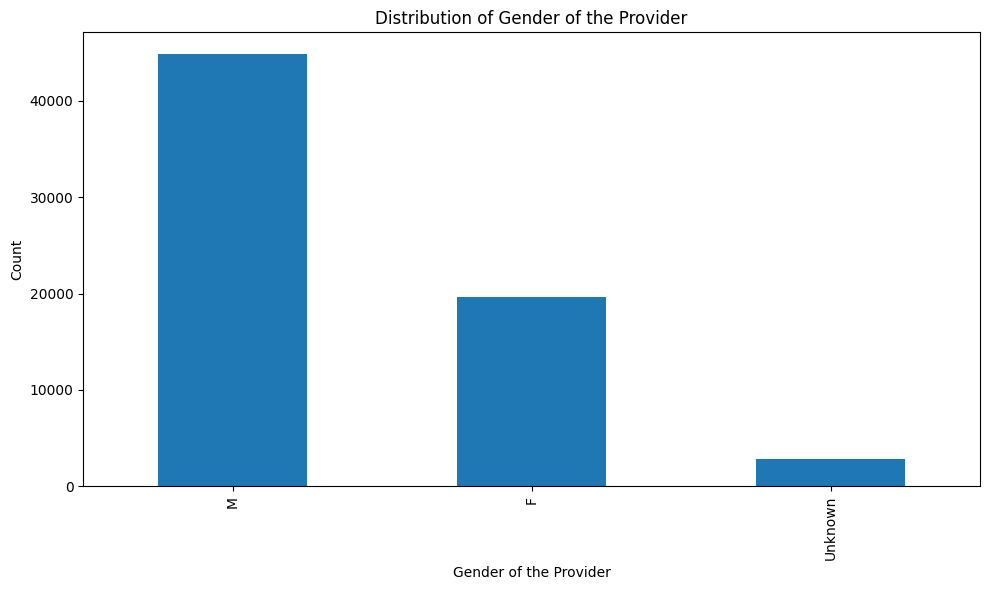


Value Counts for Entity Type of the Provider:
Entity Type of the Provider
I    64478
O     2847
Name: count, dtype: int64


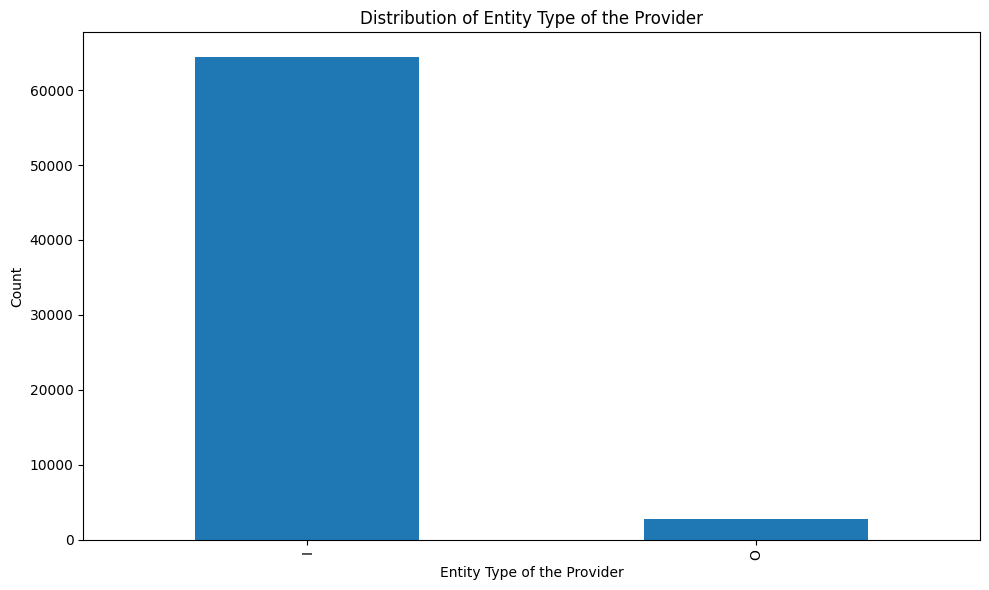


Value Counts for Provider Type:
Provider Type
Diagnostic Radiology           8406
Internal Medicine              7640
Family Practice                6668
Nurse Practitioner             3898
Cardiology                     3082
                               ... 
Clinic or Group Practice          4
Certified Nurse Midwife           3
Peripheral Vascular Disease       3
Radiation Therapy Center          2
Pharmacy                          1
Name: count, Length: 88, dtype: int64


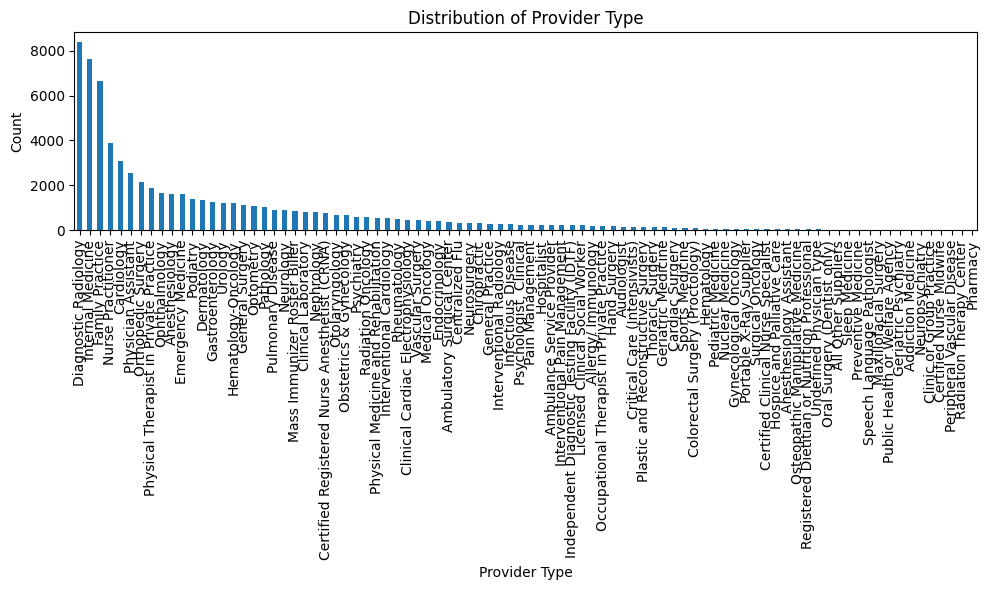


Value Counts for Medicare Participation Indicator:
Medicare Participation Indicator
Y    67302
N       22
Name: count, dtype: int64


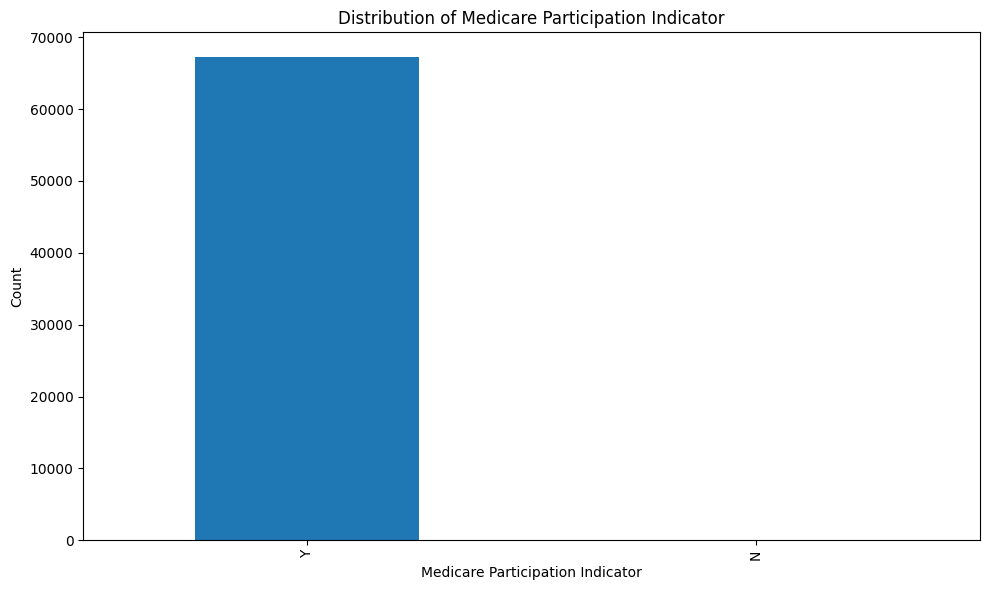


Value Counts for Place of Service:
Place of Service
O    41580
F    25744
Name: count, dtype: int64


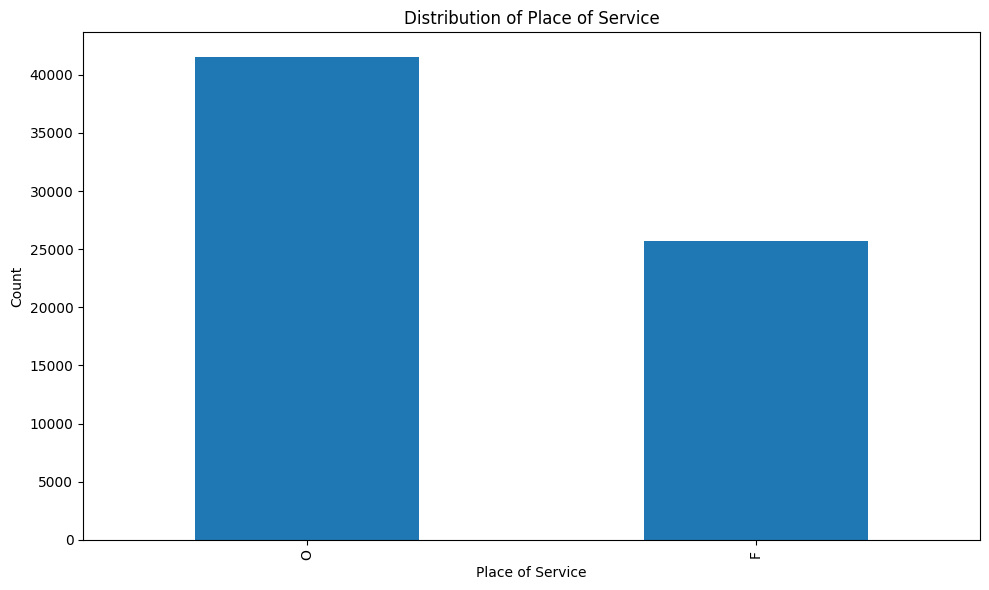


Value Counts for HCPCS Drug Indicator:
HCPCS Drug Indicator
N    63212
Y     4112
Name: count, dtype: int64


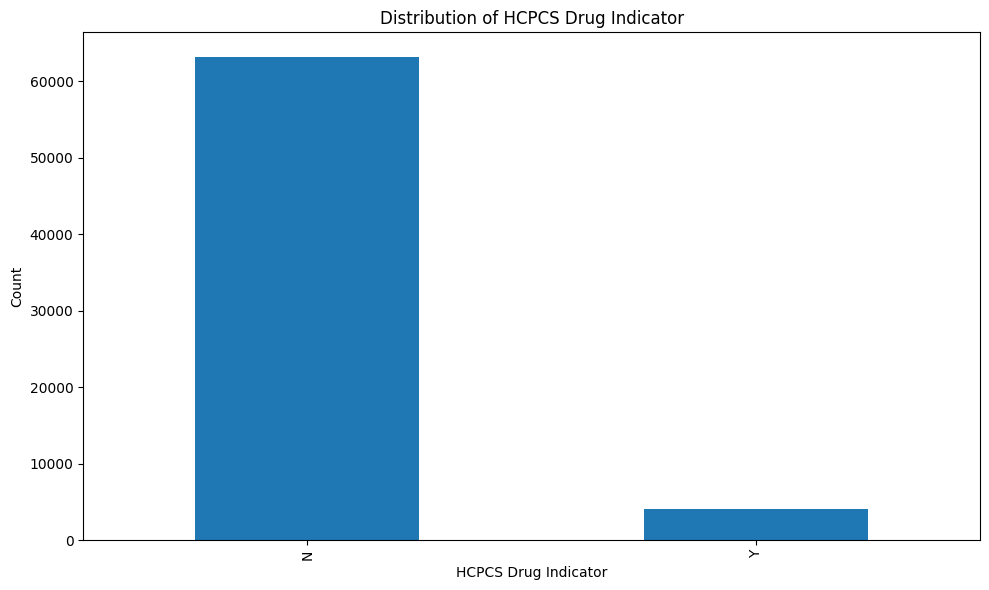

In [ ]:
# 5. Categorical Data Analysis
categorical_columns = ['Gender of the Provider', 'Entity Type of the Provider', 'Provider Type',
                       'Medicare Participation Indicator', 'Place of Service', 'HCPCS Drug Indicator']

for col in categorical_columns:
    print(f"\nValue Counts for {col}:")
    print(df[col].value_counts())

    plt.figure(figsize=(10, 6))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

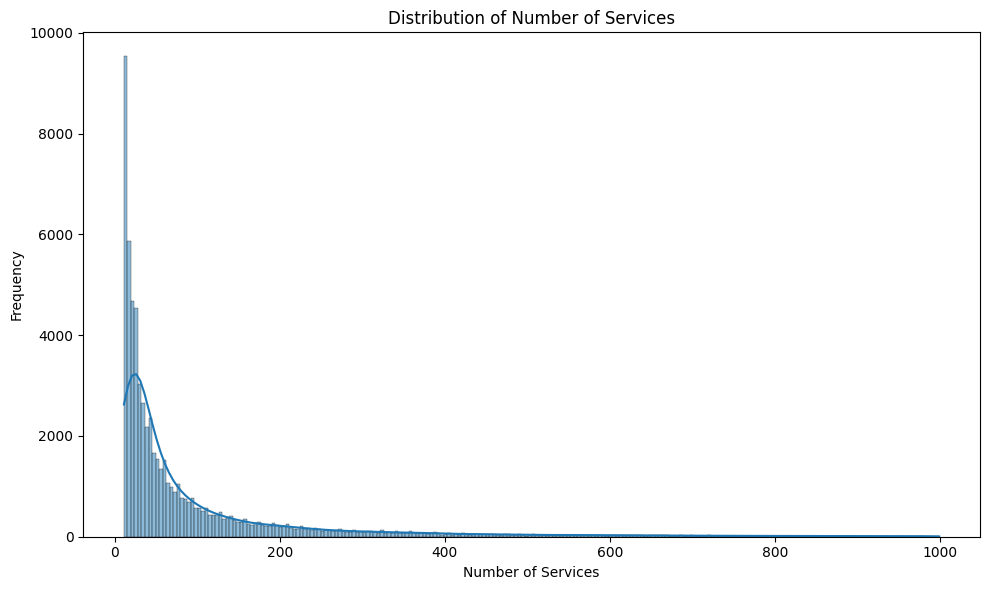

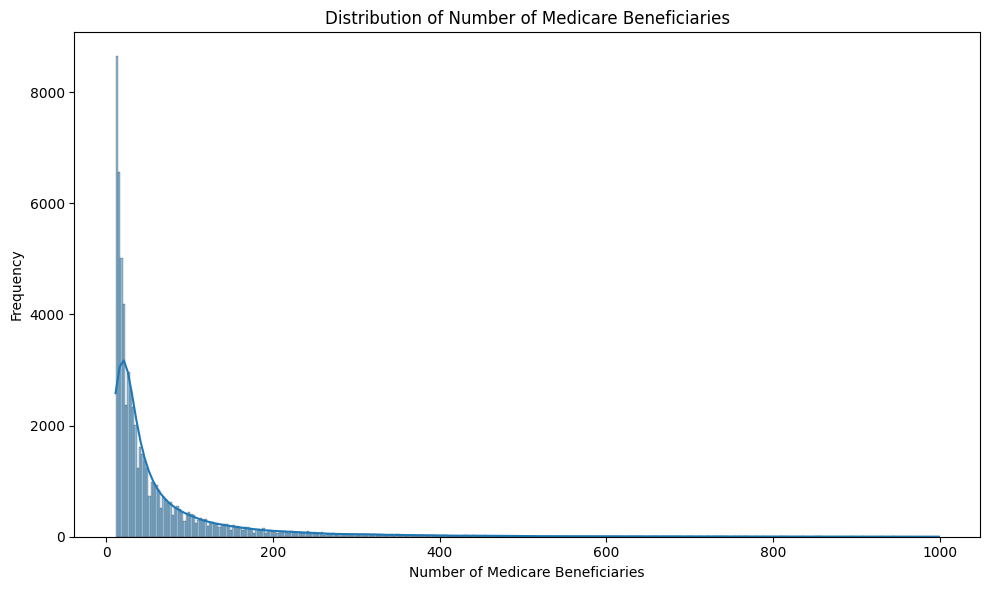

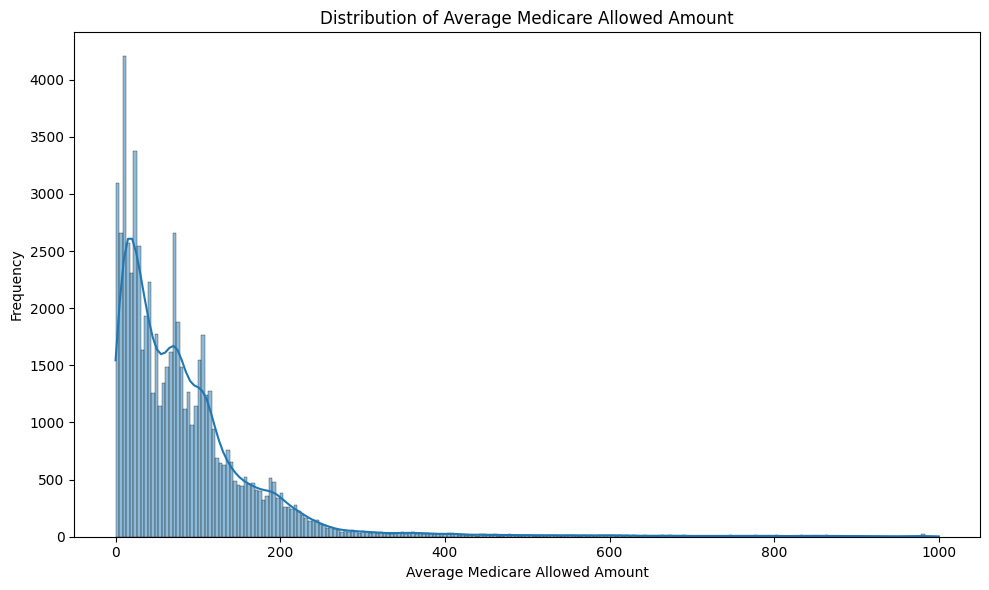

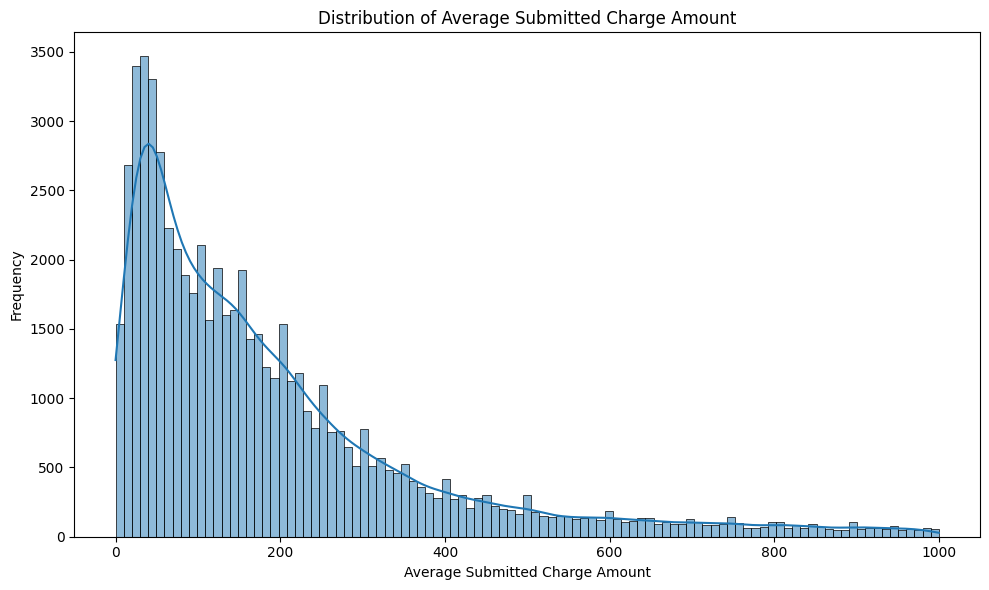

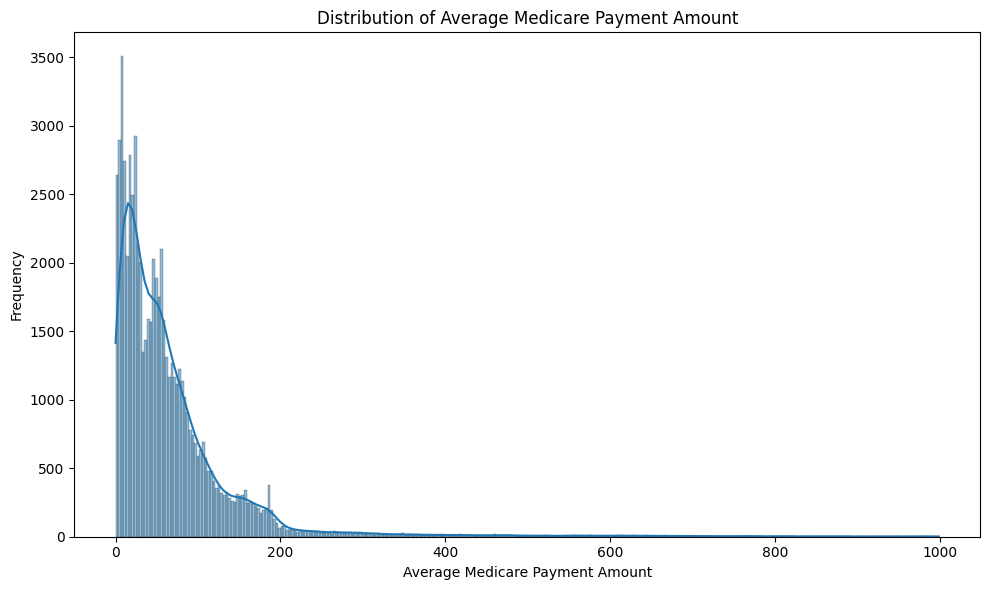

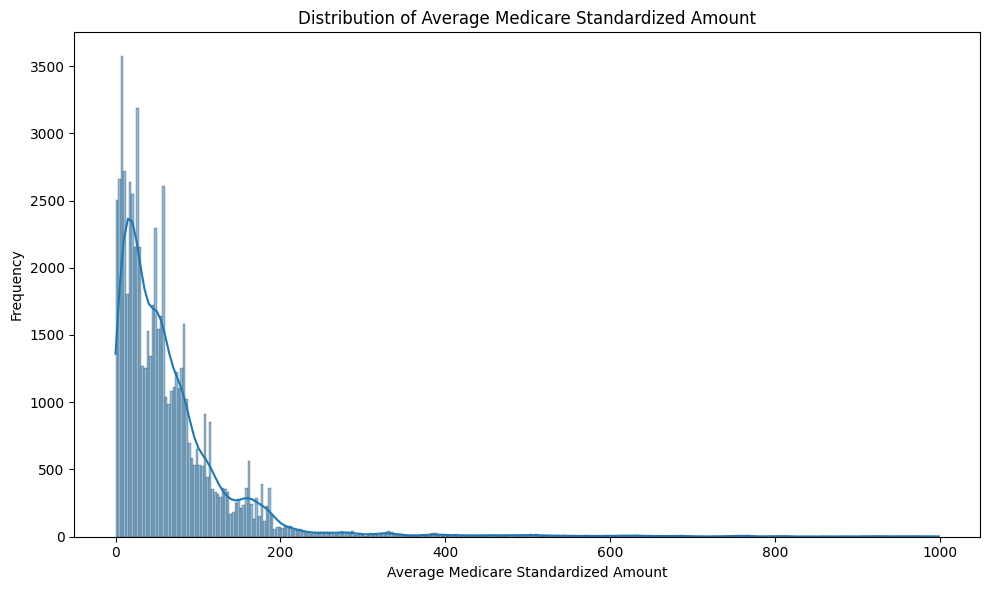

In [ ]:
# 6. Numerical Data Analysis
numerical_columns = ['Number of Services', 'Number of Medicare Beneficiaries',
                     'Average Medicare Allowed Amount', 'Average Submitted Charge Amount',
                     'Average Medicare Payment Amount', 'Average Medicare Standardized Amount']

# Convert columns to numeric type
for col in numerical_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Create histograms
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

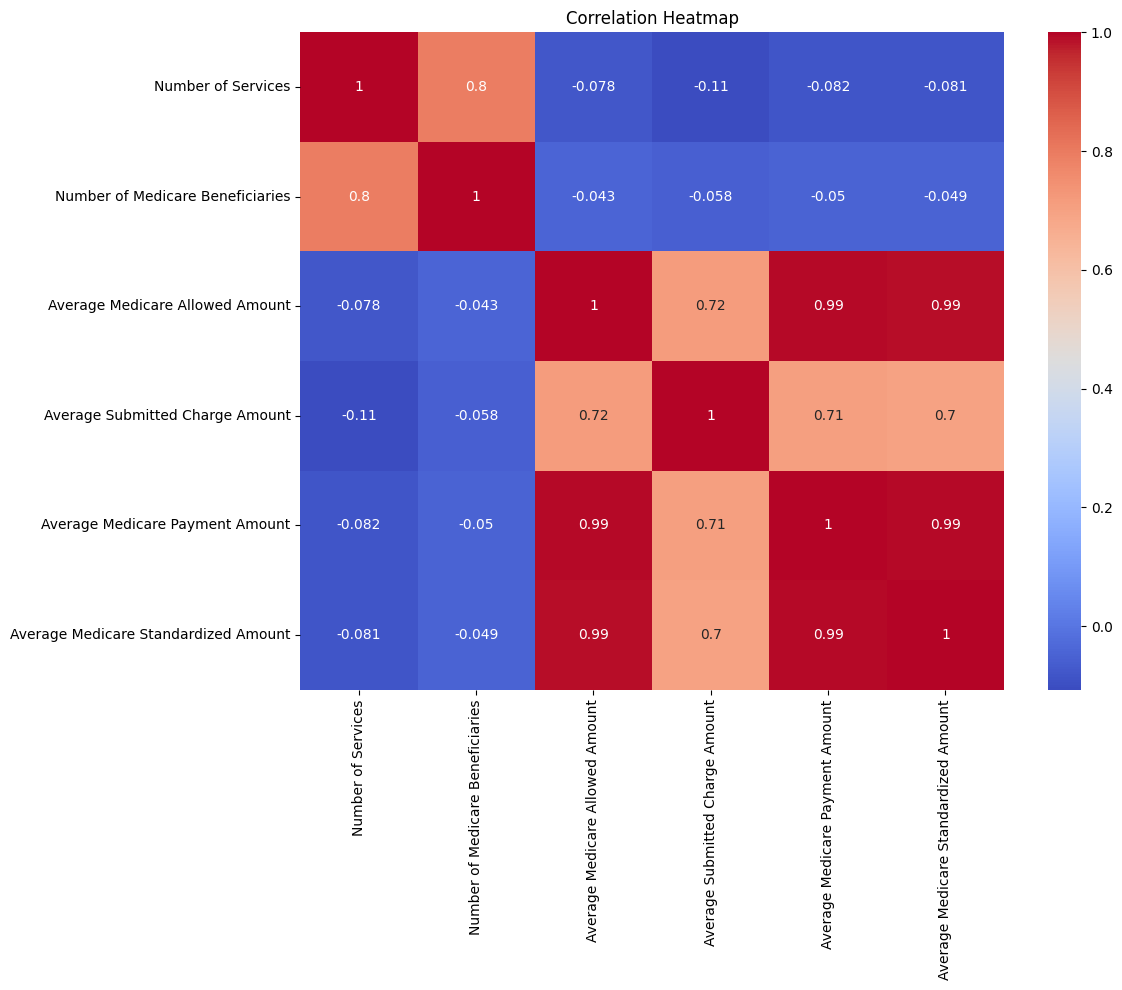

In [ ]:
# 7. Correlations
correlation_matrix = df[numerical_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

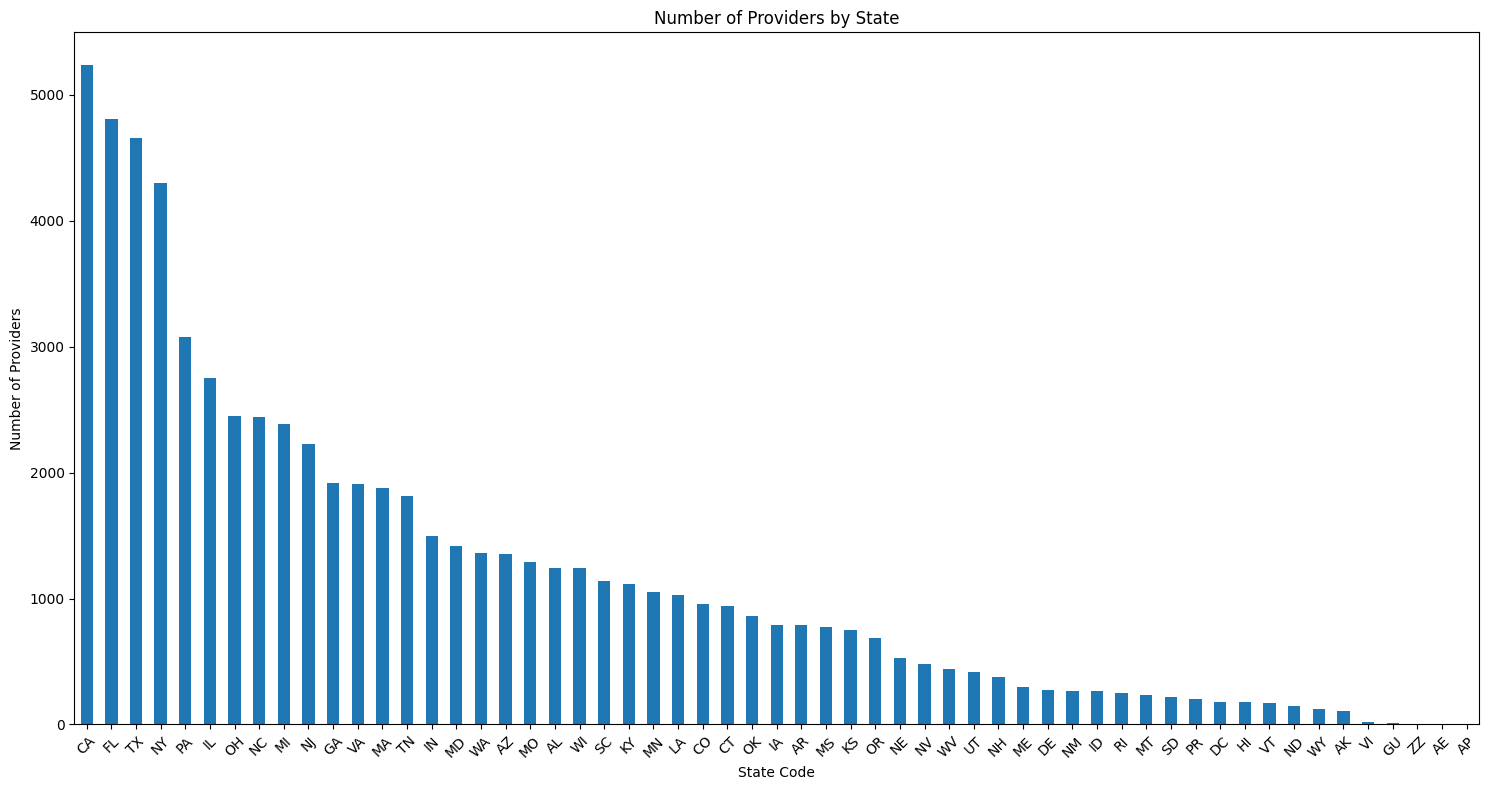

In [ ]:
# 8. Geographic Analysis
state_counts = df['State Code of the Provider'].value_counts()

plt.figure(figsize=(15, 8))
state_counts.plot(kind='bar')
plt.title('Number of Providers by State')
plt.xlabel('State Code')
plt.ylabel('Number of Providers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

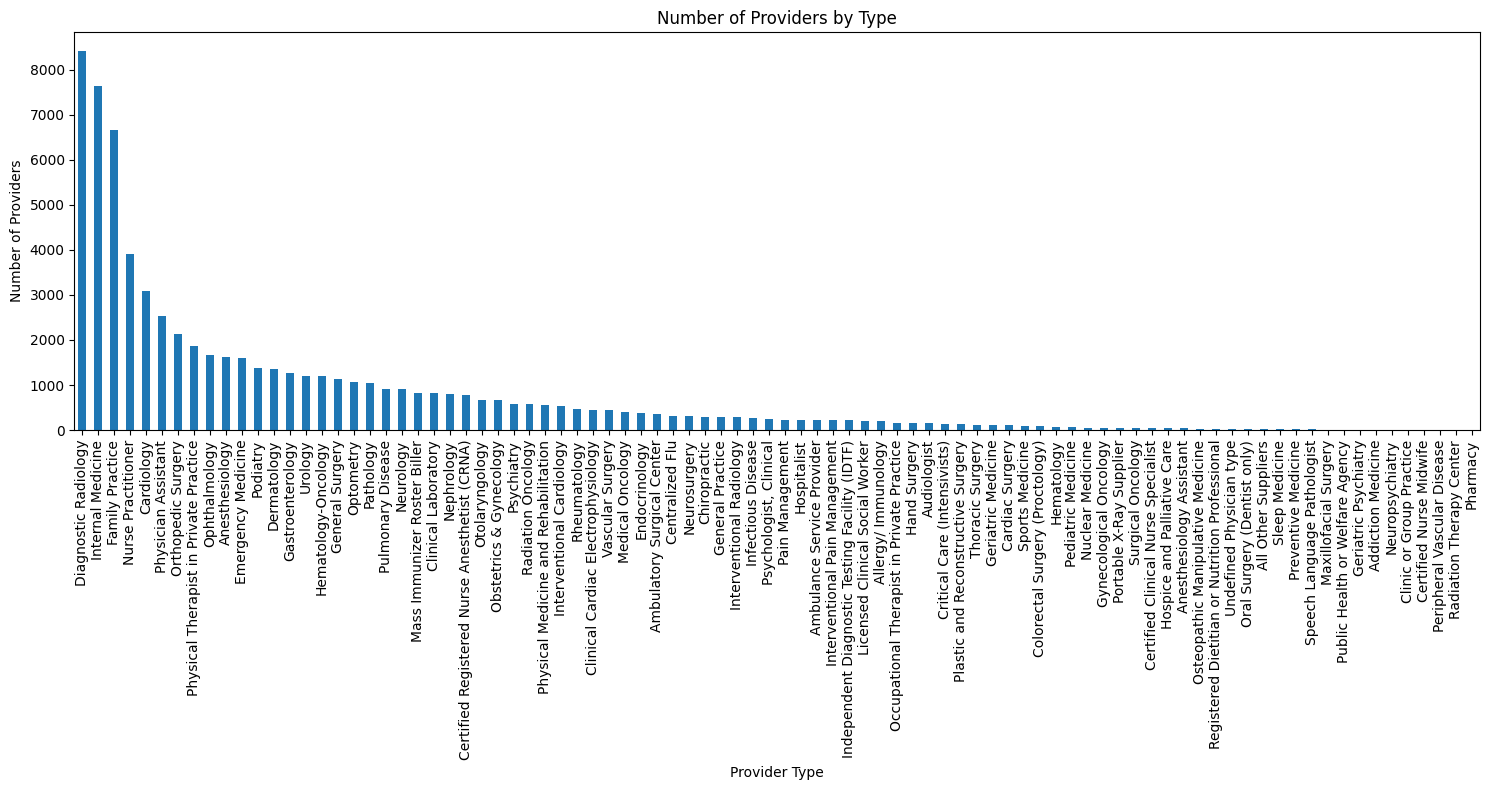

In [ ]:
# 9. Provider Type Analysis
provider_type_counts = df['Provider Type'].value_counts()

plt.figure(figsize=(15, 8))
provider_type_counts.plot(kind='bar')
plt.title('Number of Providers by Type')
plt.xlabel('Provider Type')
plt.ylabel('Number of Providers')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

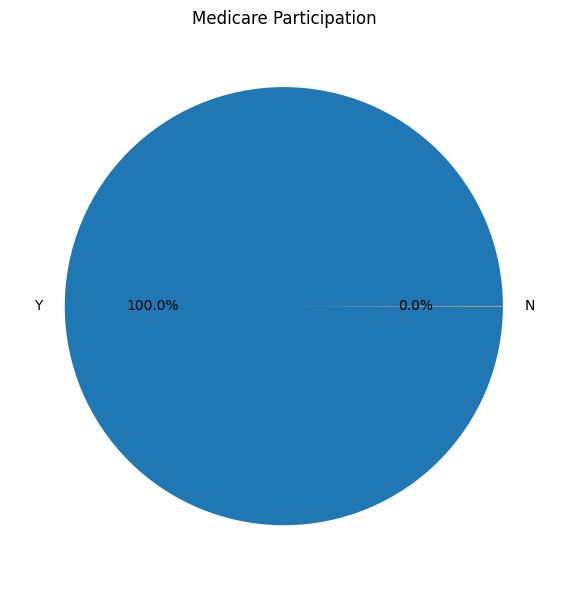

In [ ]:
# 10. Medicare Participation Analysis
medicare_participation = df['Medicare Participation Indicator'].value_counts()

plt.figure(figsize=(8, 6))
medicare_participation.plot(kind='pie', autopct='%1.1f%%')
plt.title('Medicare Participation')
plt.ylabel('')
plt.tight_layout()
plt.show()

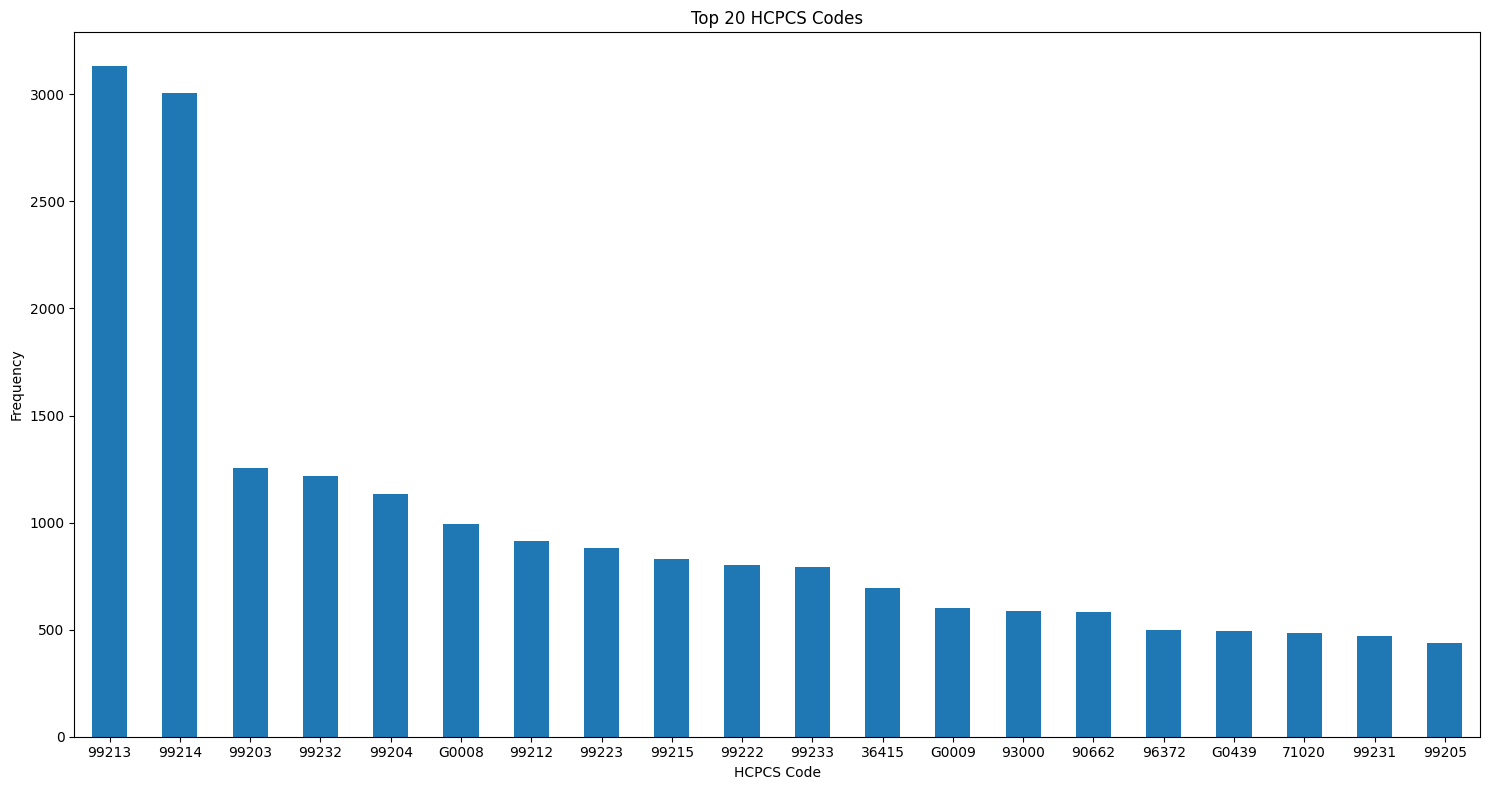

In [ ]:
# 11. HCPCS Code Analysis
top_hcpcs = df['HCPCS Code'].value_counts().head(20)

plt.figure(figsize=(15, 8))
top_hcpcs.plot(kind='bar')
plt.title('Top 20 HCPCS Codes')
plt.xlabel('HCPCS Code')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

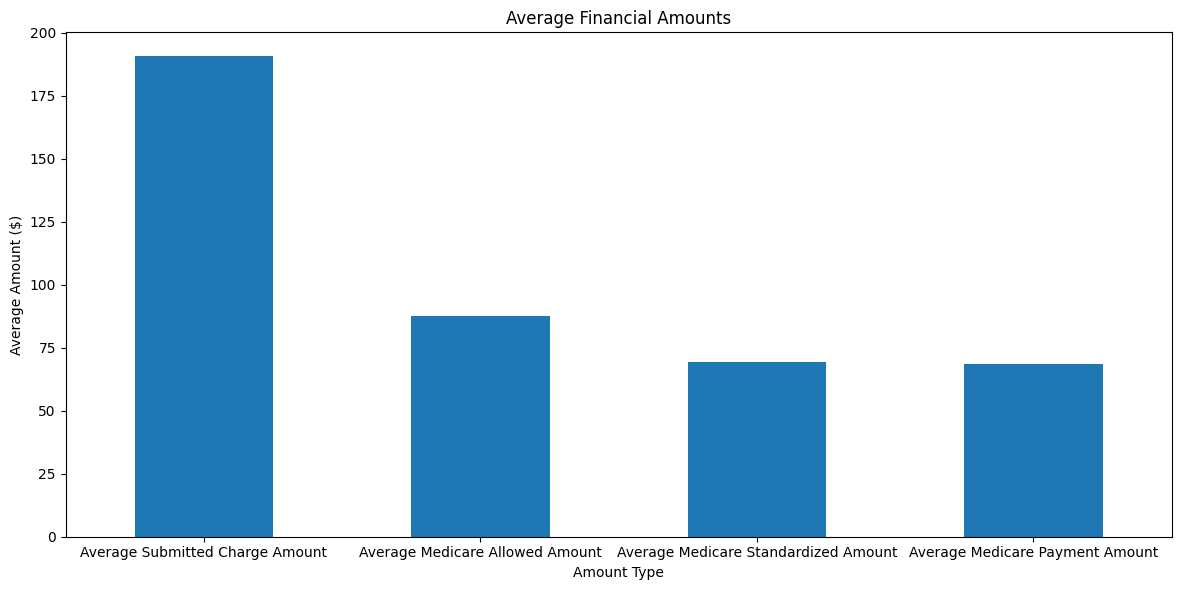

In [ ]:
# 12. Financial Analysis
financial_columns = ['Average Medicare Allowed Amount', 'Average Submitted Charge Amount',
                     'Average Medicare Payment Amount', 'Average Medicare Standardized Amount']

df_financial = df[financial_columns].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
df_financial.plot(kind='bar')
plt.title('Average Financial Amounts')
plt.xlabel('Amount Type')
plt.ylabel('Average Amount ($)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

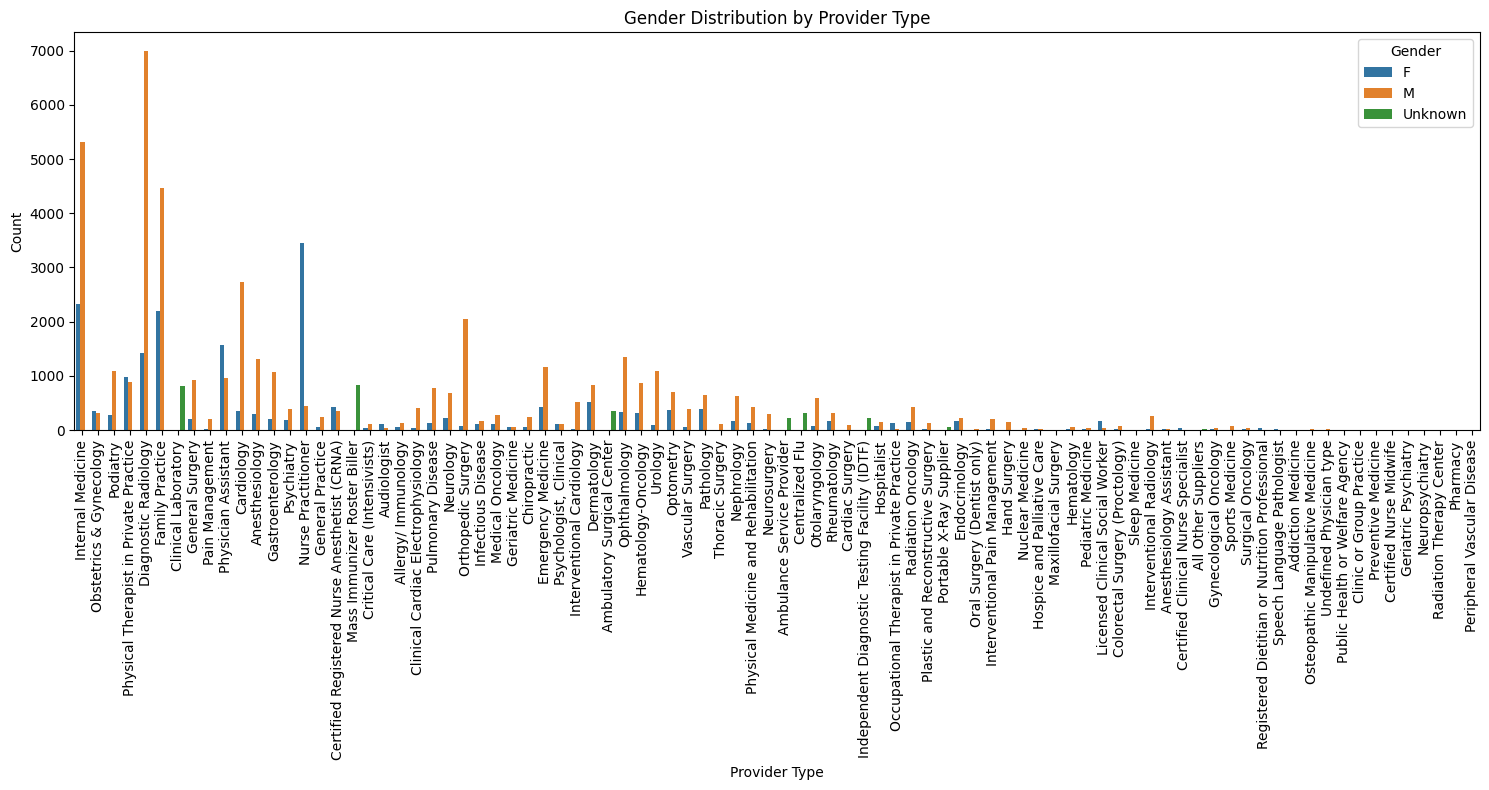

In [ ]:
# 13. Gender Distribution by Provider Type
plt.figure(figsize=(15, 8))
sns.countplot(data=df, x='Provider Type', hue='Gender of the Provider')
plt.title('Gender Distribution by Provider Type')
plt.xlabel('Provider Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


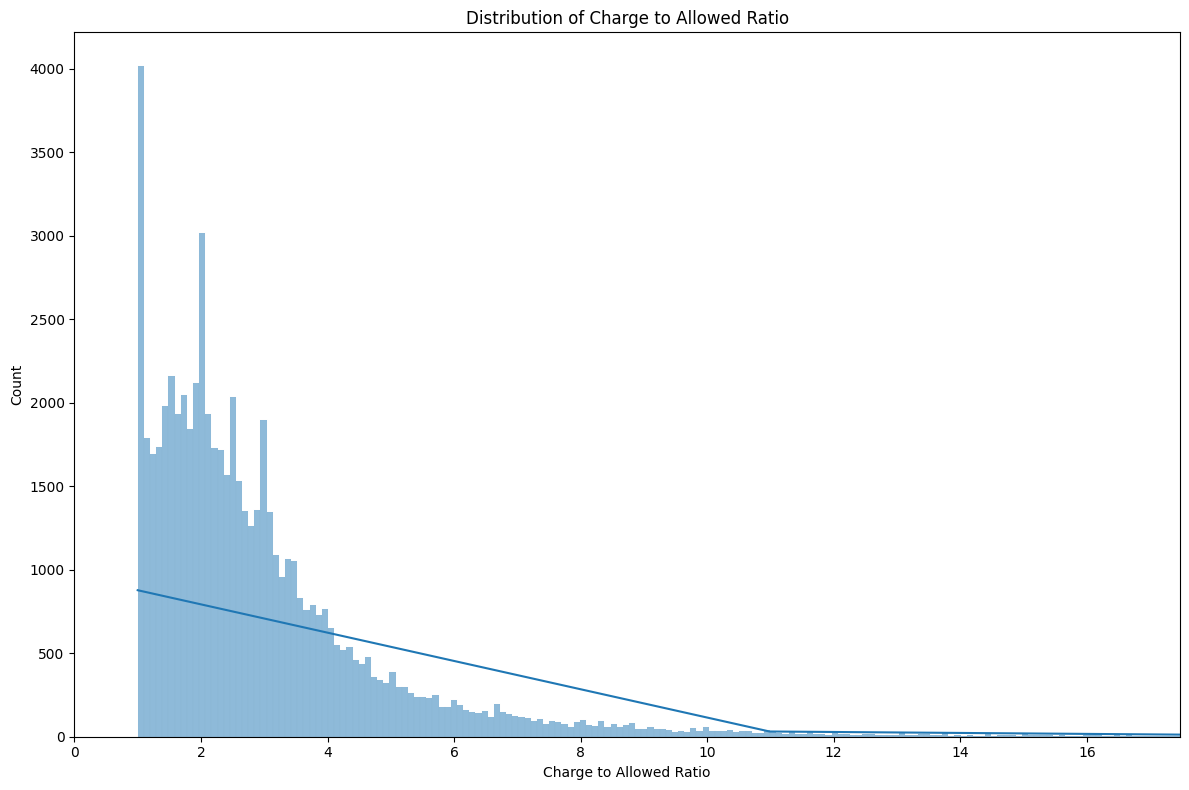

In [ ]:
# 3. Histogram of the ratio of submitted charges to allowed amount
df['Charge_to_Allowed_Ratio'] = df['Average Submitted Charge Amount'] / df['Average Medicare Allowed Amount']
plt.figure(figsize=(12, 8))
sns.histplot(df['Charge_to_Allowed_Ratio'], kde=True)
plt.title('Distribution of Charge to Allowed Ratio')
plt.xlabel('Charge to Allowed Ratio')
plt.xlim(0, df['Charge_to_Allowed_Ratio'].quantile(0.99))  # Limit x-axis to 99th percentile
plt.tight_layout()
plt.show()

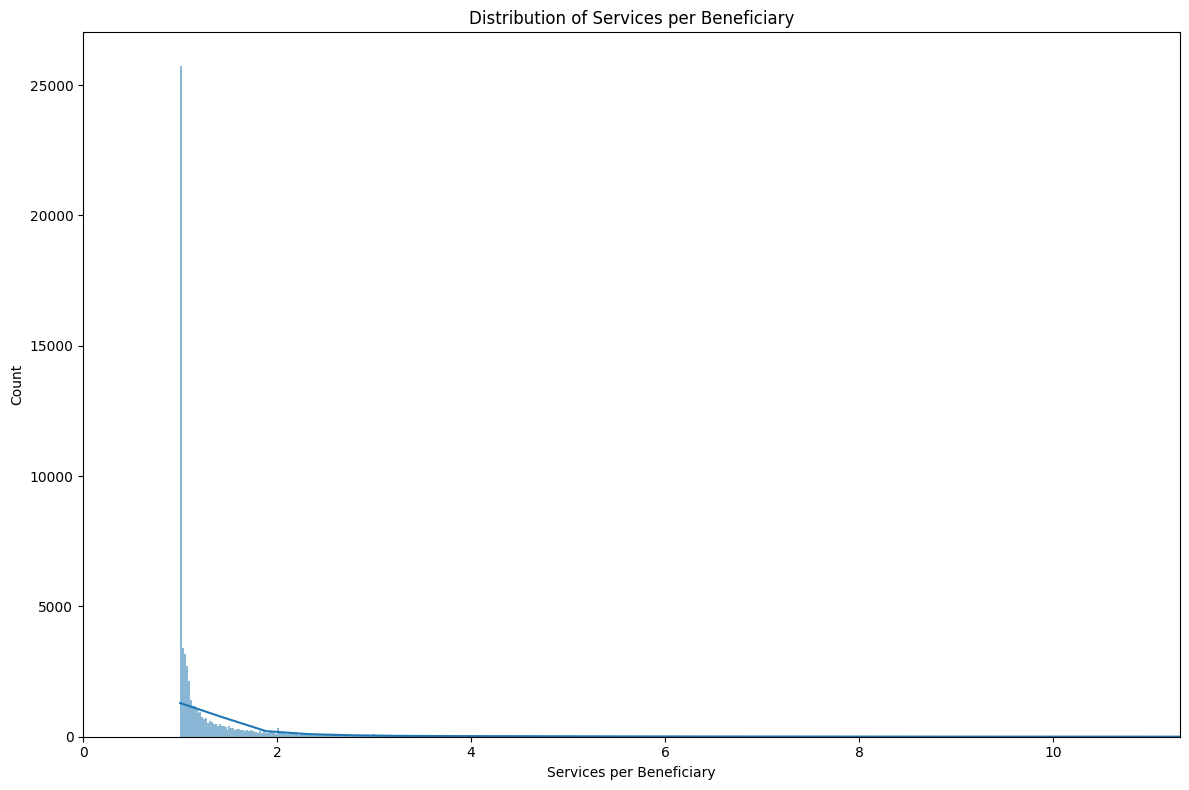

In [ ]:
# 4. Number of services per beneficiary
df['Services_per_Beneficiary'] = df['Number of Services'].astype(float) / df['Number of Medicare Beneficiaries'].astype(float)
plt.figure(figsize=(12, 8))
sns.histplot(df['Services_per_Beneficiary'], kde=True)
plt.title('Distribution of Services per Beneficiary')
plt.xlabel('Services per Beneficiary')
plt.xlim(0, df['Services_per_Beneficiary'].quantile(0.99))  # Limit x-axis to 99th percentile
plt.tight_layout()
plt.show()

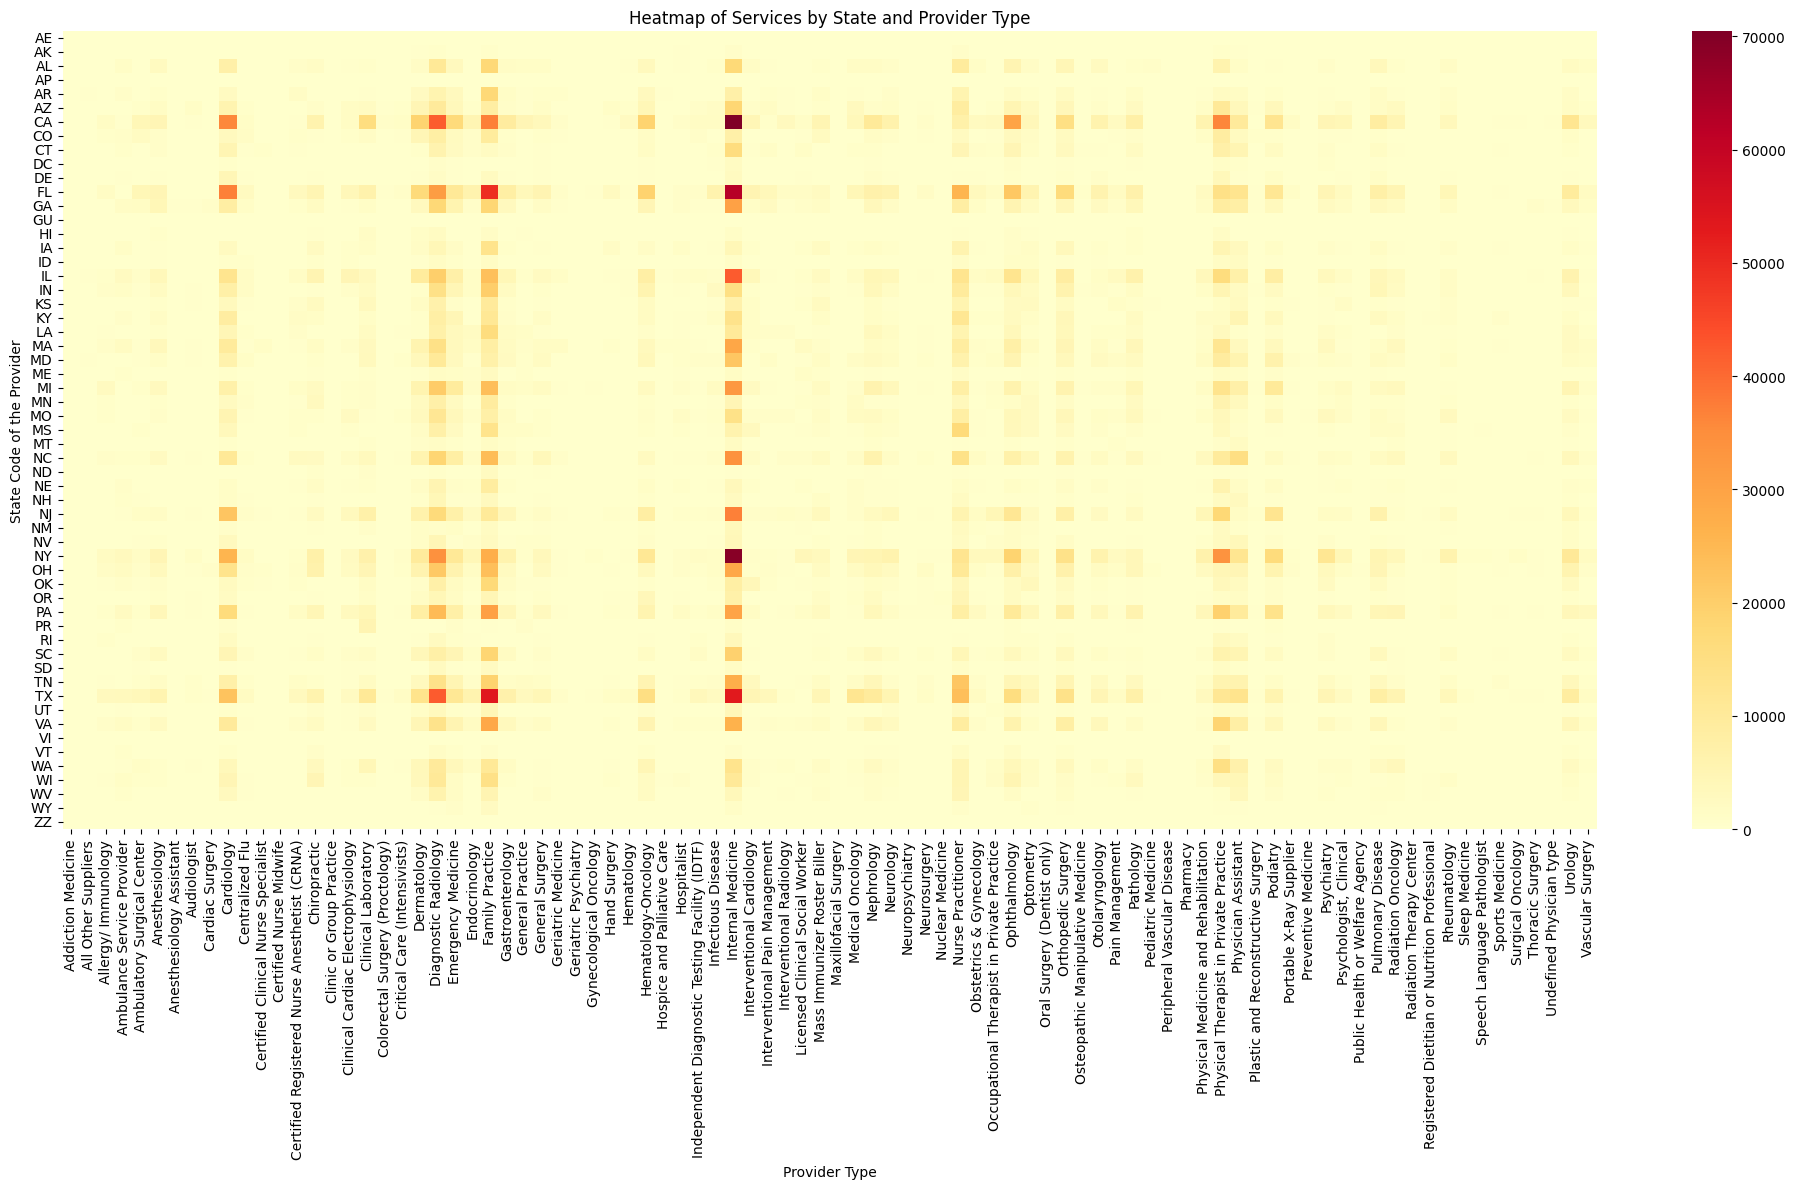

In [ ]:
# 6. Heatmap of services by state and provider type
pivot = df.pivot_table(values='Number of Services', index='State Code of the Provider',
                       columns='Provider Type', aggfunc='sum', fill_value=0)
plt.figure(figsize=(20, 12))
sns.heatmap(pivot, cmap='YlOrRd')
plt.title('Heatmap of Services by State and Provider Type')
plt.tight_layout()
plt.show()

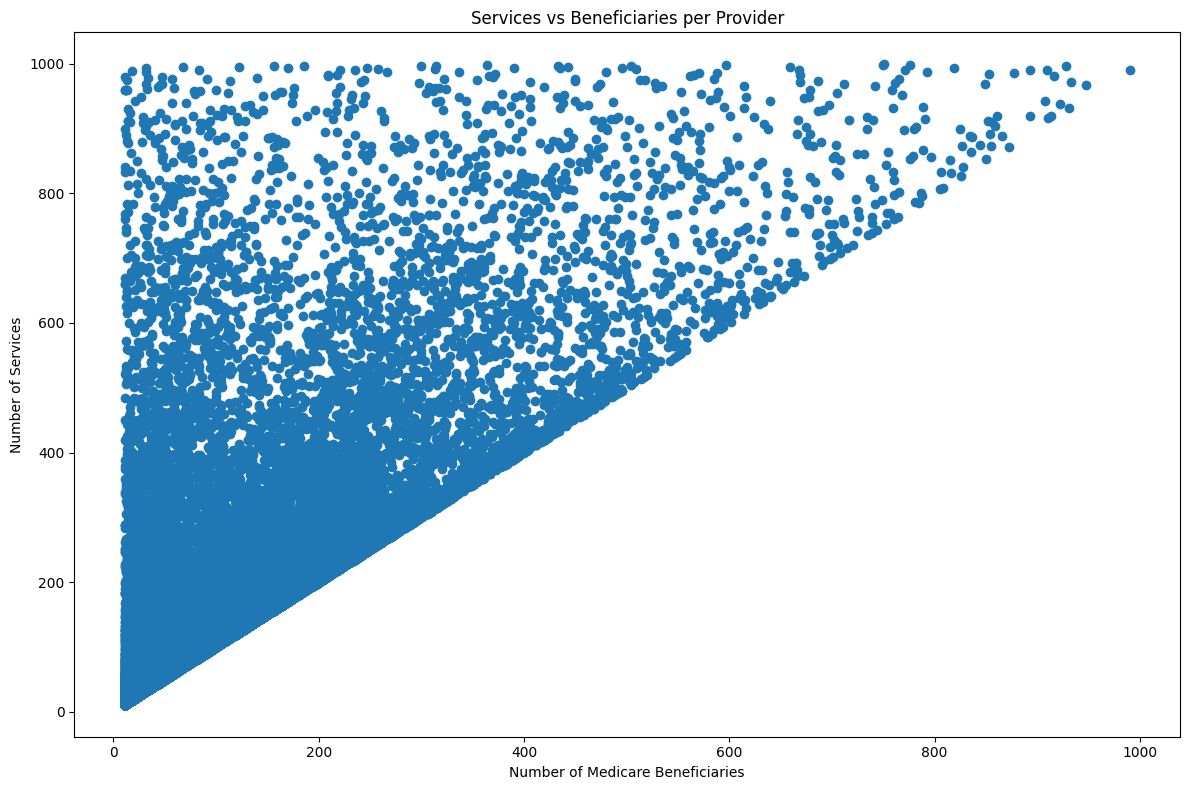

In [ ]:
# 8. Network analysis of providers and beneficiaries
plt.figure(figsize=(12, 8))
plt.scatter(df['Number of Medicare Beneficiaries'], df['Number of Services'])
plt.xlabel('Number of Medicare Beneficiaries')
plt.ylabel('Number of Services')
plt.title('Services vs Beneficiaries per Provider')
plt.tight_layout()
plt.show()

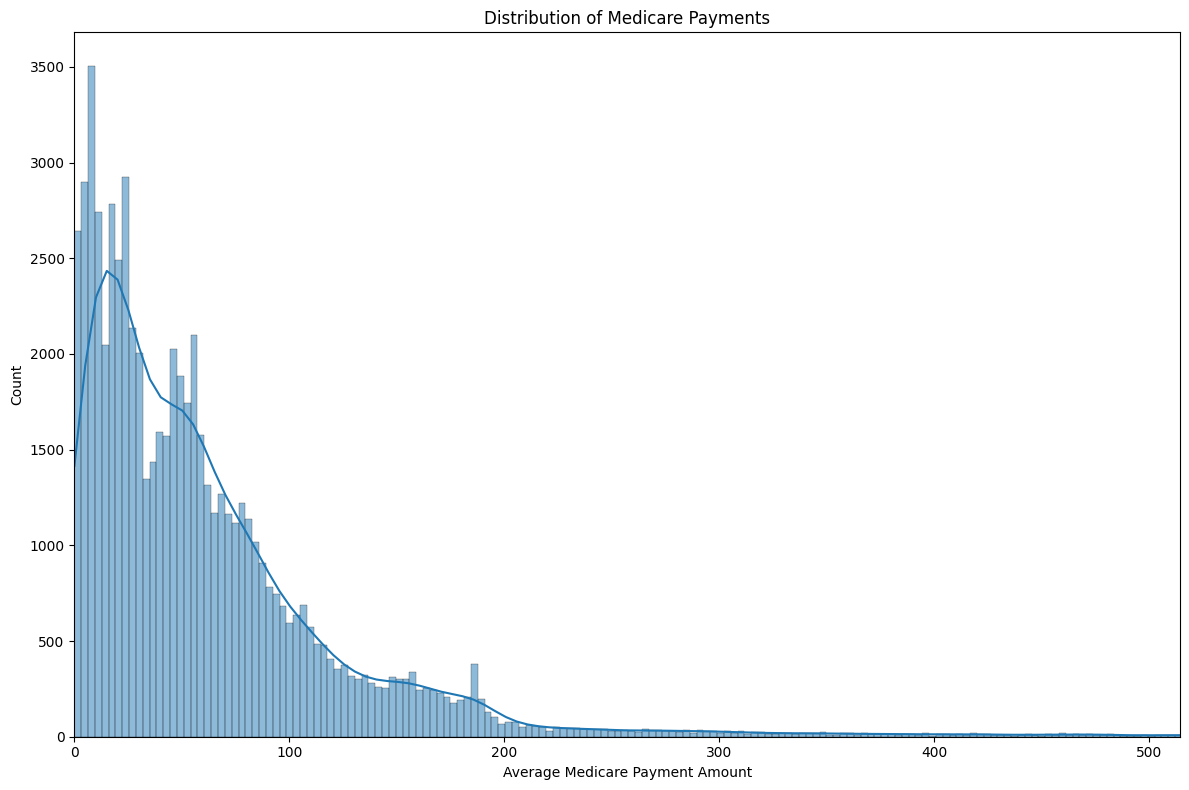

In [ ]:
# 9. Distribution of payments
plt.figure(figsize=(12, 8))
sns.histplot(df['Average Medicare Payment Amount'], kde=True)
plt.title('Distribution of Medicare Payments')
plt.xlabel('Average Medicare Payment Amount')
plt.xlim(0, df['Average Medicare Payment Amount'].quantile(0.99))  # Limit x-axis to 99th percentile
plt.tight_layout()
plt.show()

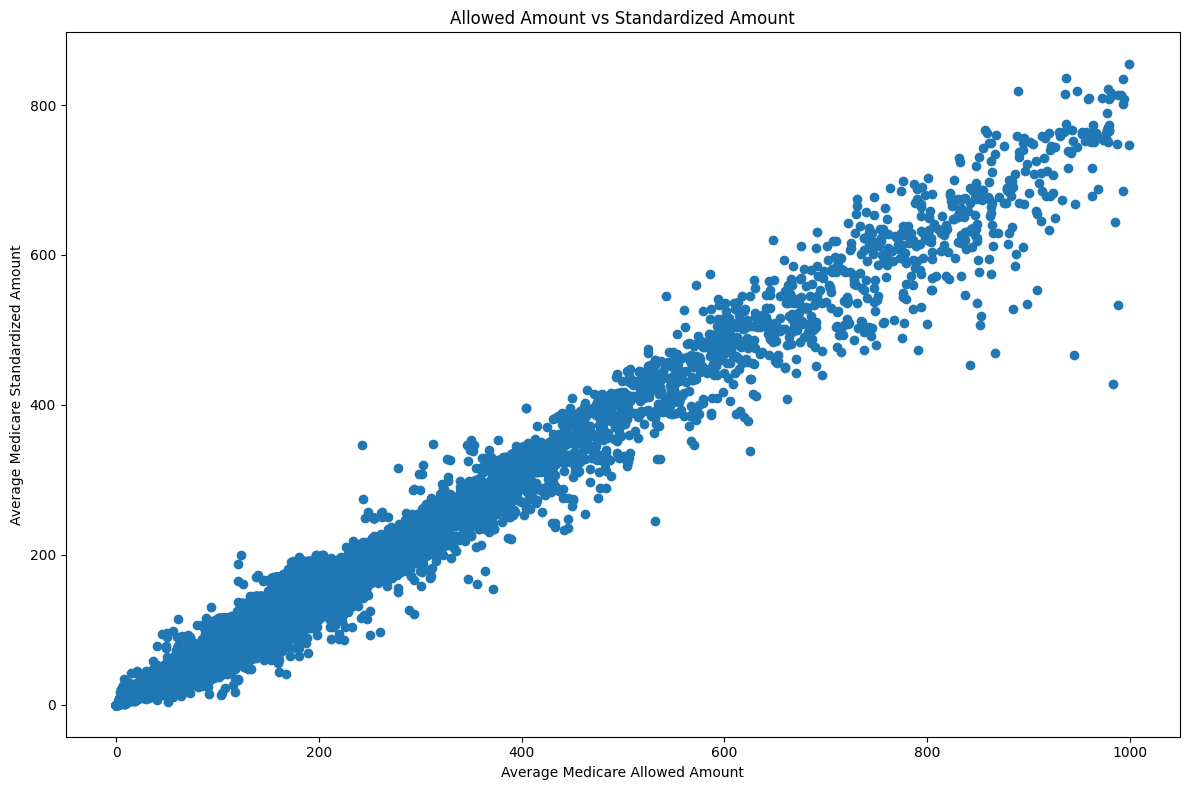

In [ ]:
# 10. Comparison of allowed amount to standardized amount
plt.figure(figsize=(12, 8))
plt.scatter(df['Average Medicare Allowed Amount'], df['Average Medicare Standardized Amount'])
plt.xlabel('Average Medicare Allowed Amount')
plt.ylabel('Average Medicare Standardized Amount')
plt.title('Allowed Amount vs Standardized Amount')
plt.tight_layout()
plt.show()

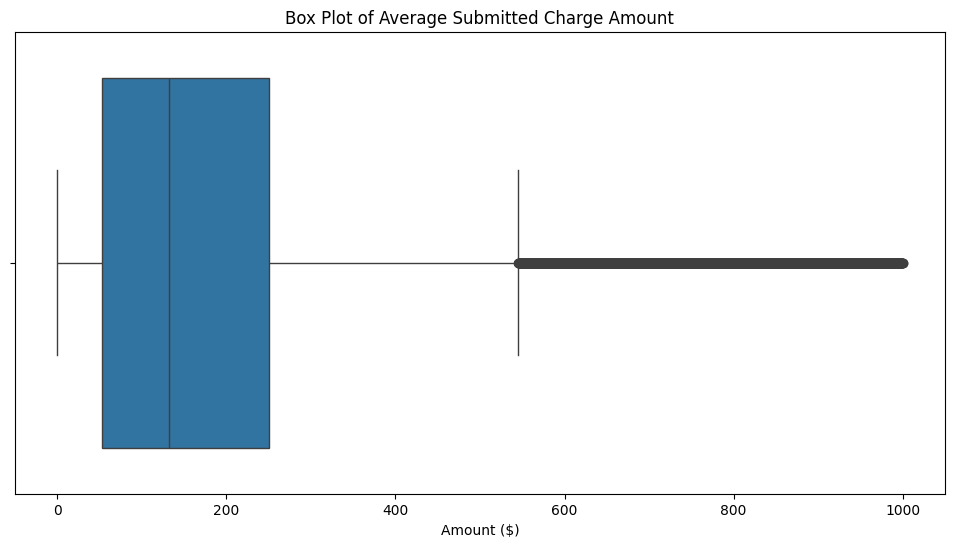

In [ ]:
# Visualize outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Average Submitted Charge Amount'])
plt.title('Box Plot of Average Submitted Charge Amount')
plt.xlabel('Amount ($)')
plt.show()


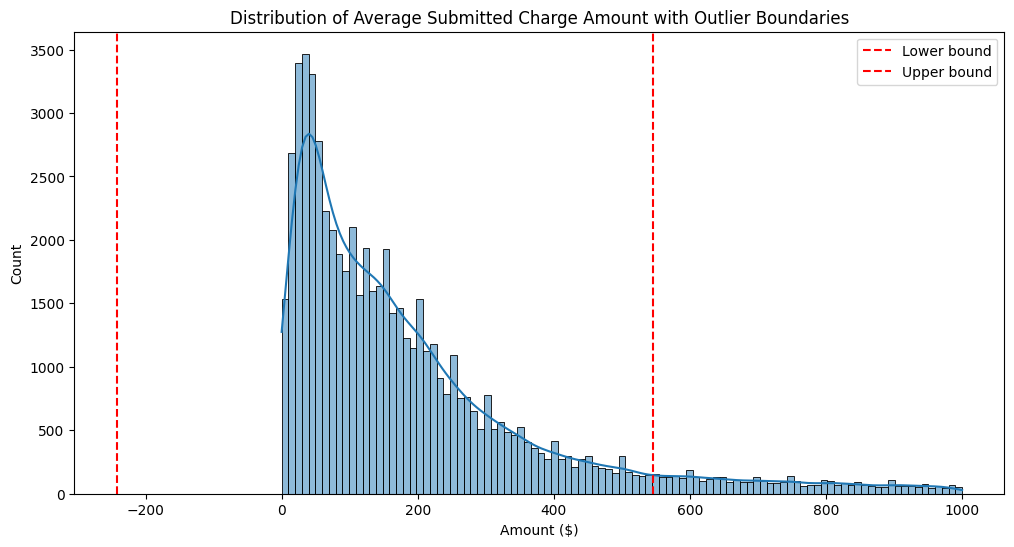

In [ ]:
def iqr_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Detect outliers
outliers, lower_bound, upper_bound = iqr_outliers(df, 'Average Submitted Charge Amount')

plt.figure(figsize=(12, 6))
sns.histplot(df['Average Submitted Charge Amount'], kde=True)
plt.axvline(lower_bound, color='r', linestyle='dashed', label='Lower bound')
plt.axvline(upper_bound, color='r', linestyle='dashed', label='Upper bound')
plt.title('Distribution of Average Submitted Charge Amount with Outlier Boundaries')
plt.xlabel('Amount ($)')
plt.legend()
plt.show()

In [ ]:
print(f"Number of outliers detected: {len(outliers)}")
print(f"Percentage of outliers: {len(outliers) / len(df) * 100:.2f}%")
print(f"Lower bound: ${lower_bound:.2f}")
print(f"Upper bound: ${upper_bound:.2f}")

Number of outliers detected: 4229
Percentage of outliers: 6.28%
Lower bound: $-242.37
Upper bound: $545.42


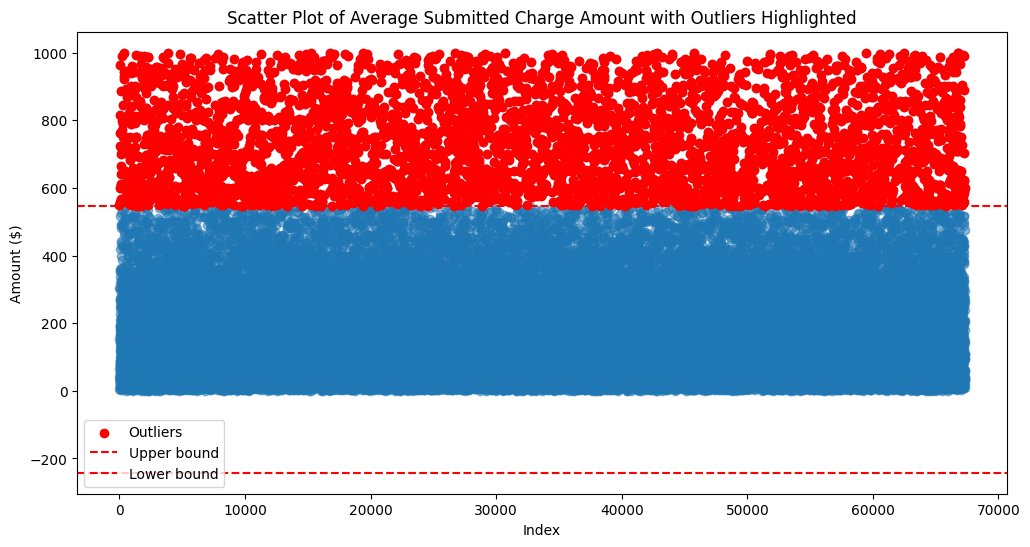

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(df.index, df['Average Submitted Charge Amount'], alpha=0.5)
plt.scatter(outliers.index, outliers['Average Submitted Charge Amount'], color='red', label='Outliers')
plt.axhline(upper_bound, color='r', linestyle='dashed', label='Upper bound')
plt.axhline(lower_bound, color='r', linestyle='dashed', label='Lower bound')
plt.title('Scatter Plot of Average Submitted Charge Amount with Outliers Highlighted')
plt.xlabel('Index')
plt.ylabel('Amount ($)')
plt.legend()
plt.show()

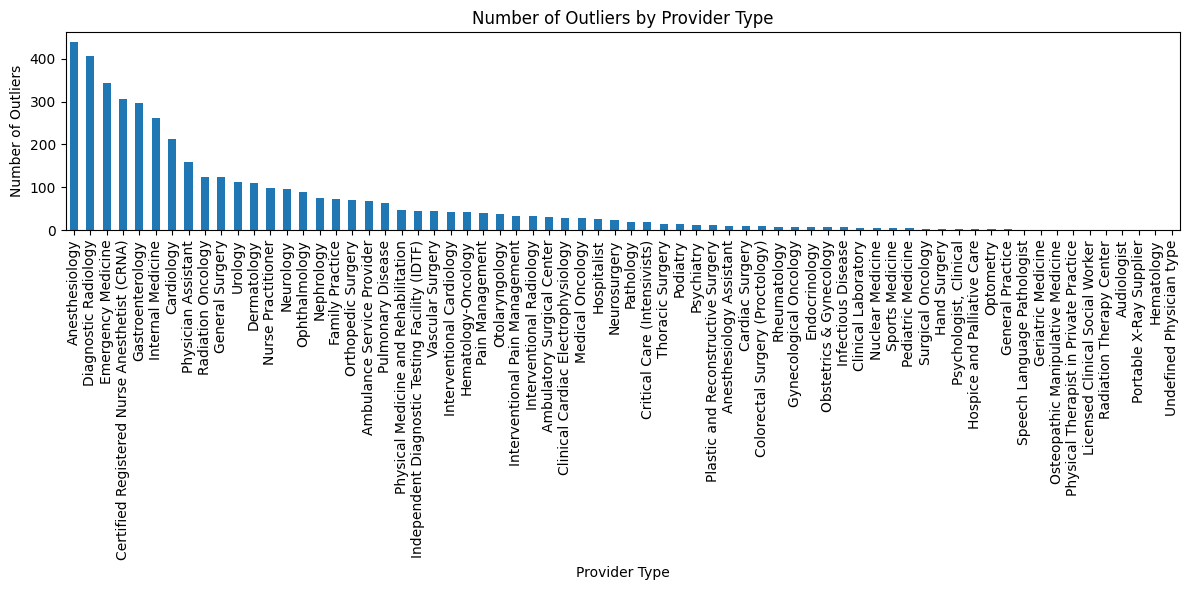

In [ ]:
# Analyze outliers by provider type
outliers_by_type = outliers['Provider Type'].value_counts()
plt.figure(figsize=(12, 6))
outliers_by_type.plot(kind='bar')
plt.title('Number of Outliers by Provider Type')
plt.xlabel('Provider Type')
plt.ylabel('Number of Outliers')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

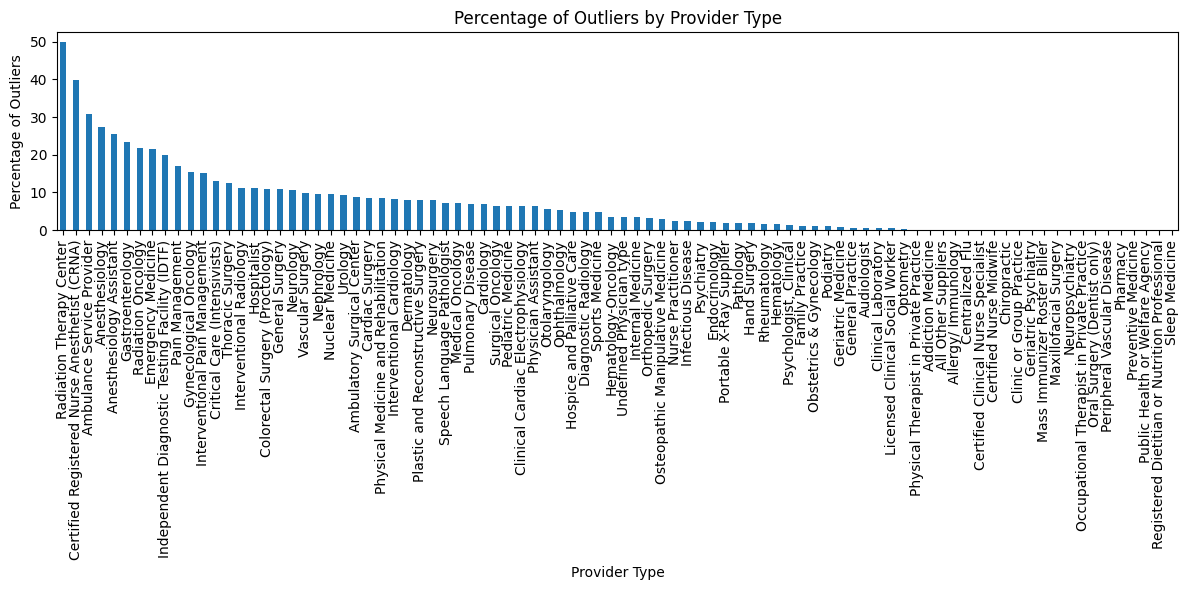

In [ ]:
# Calculate and display outlier percentages by provider type
total_by_type = df['Provider Type'].value_counts()
outlier_percentages = (outliers_by_type / total_by_type * 100).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
outlier_percentages.plot(kind='bar')
plt.title('Percentage of Outliers by Provider Type')
plt.xlabel('Provider Type')
plt.ylabel('Percentage of Outliers')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()